----FIT RESULTS----
T = 2.26E+03
omega = 1.11E-02


2260.753457927698

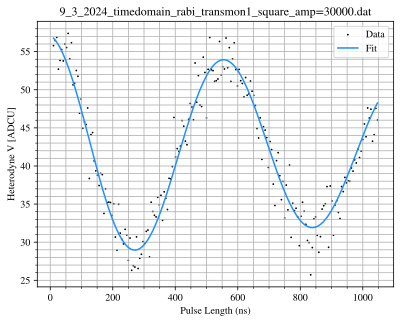

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import Qore as qr

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.formatter.useoffset'] = False

# Rabifit
def RabiFit(Data, Output = True):
    Time = Data[:,0]
    HeterodynSignal = Data[:,1]
    a_guess = (np.max(HeterodynSignal) - np.min(HeterodynSignal))/2
    phi0_guess = 0
    T_guess = Time[-1]/5
    c_guess = HeterodynSignal[-1]
    omega_guess = 6.28/(2*np.abs(Time[np.argmax(HeterodynSignal)] - Time[np.argmin(HeterodynSignal)]))

    popt, pcov = curve_fit(lambda t, a, T, c, omega, phi0: a * np.cos(omega*t+phi0) * np.exp(-t/T) + c, Time, HeterodynSignal, p0=(a_guess, T_guess, c_guess, omega_guess, phi0_guess))
    a_fit = popt[0]
    T_fit = popt[1]
    c_fit = popt[2]
    omega_fit = popt[3]
    phi0_fit = popt[4]
    HeterodynSignalFitted = a_fit * np.cos(omega_fit*Time+phi0_fit)* np.exp(-Time/T_fit) + c_fit
    if Output == True:
        print('----FIT RESULTS----')
        print('T = %.2E'% T_fit)
        print('omega = %.2E'% omega_fit)
        plt.figure()#figsize = [11,5])
        plt.scatter(Time,HeterodynSignal, s=0.7, color='black', label='Data');  
        plt.plot(Time, HeterodynSignalFitted, color='dodgerblue', label='Fit');
        plt.grid(which = 'both')
        plt.minorticks_on()
        plt.title(f'{FileName}')
        plt.xlabel("Pulse Length (ns)")
        plt.ylabel('Heterodyne V [ADCU]')
        plt.legend()
    return T_fit

FileName = '9_3_2024_timedomain_rabi_transmon1_square_amp=30000.dat'
Data = np.loadtxt(FileName, delimiter=',')

RabiFit(Data, Output = True)

#plt.savefig("RabiFit10k",facecolor="w")
